
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## SWAN simulations

inputs required: 
  * Sea and swell selected cases from ***MDA***

in this notebook:
  * SWAN mesh descriptions
  * SWAN simulations for sea and swell conditions
  * Read and store SWAN output at the location of study


### Workflow:

<div>
    <img src="../resources/nb02_02.png" width="400px">
</div>




The SWAN model allows to simulate the wave propagation in nearshore areas (Booij et al., 1999). The design points from notebook 02_01 provide the boundary conditions for a series of simulations from the SWAN model. SWAN was run in stationary mode. Sea and Swell conditions have been simulated independently and summed linearly afterwards. 

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..', '..'))

# teslakit
from teslakit.database import Database, hyswan_db

# swan custom toolbox
from teslakit.numerical_models.swan.wrap import SwanProject, SwanWrap_STAT
from teslakit.numerical_models.swan.plots.stat import scatter_maps


In [2]:
# swan module needs SWAN serial executable, more information at teslakit README.md file

# This function will copy a compiled executable to our module:

#from teslakit.numerical_models import swan
#swan.set_swan_binary_file('swan.exe')



## Database and Site parameters

In [3]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')

# hyswan simulation database
db_sim = hyswan_db(db.paths.site.HYSWAN.sim)



## SWAN: site files, main and nested grid descriptions

In [4]:
# SWAN site bathymetry files
p_swan = db.paths.site.HYSWAN.swan_site
p_swan_ext = op.join(p_swan, 'Roinamur_ext_bottom.dat')
p_swan_int = op.join(p_swan, 'Roinamur_int_bottom.dat')

# SWAN site shore (for plots)
p_shore = op.join(p_swan, 'shore.npy')
np_shore = np.load(p_shore)

# SWAN grids description
main_grid = {
    'xpc': 166.6159,  # x origin
    'ypc': 8.4105,    # y origin
    'alpc': 0,        # x-axis direction 
    'xlenc': 1.3722,  # grid length in x
    'ylenc': 1.175,   # grid length in y
    'mxc': 137,       # number mesh x
    'myc': 118,       # number mesh y
    'dxinp': 0.01,    # size mesh x
    'dyinp': 0.01,    # size mesh y
}

nested_grid = {
    'xpc': 167.4059,
    'ypc': 9.3505,
    'alpc': 0,
    'xlenc': 0.12,
    'ylenc': 0.08,
    'mxc': 120,
    'myc': 80,
    'dxinp': 0.001,
    'dyinp': 0.001,
}



## SWAN: SIMULATION SEA waves 

In [12]:
# load Historical sea MDA subset
wvs_sea_subset = db_sim.Load('sea_subset')


# waves data hs and spr
wvs_sea_subset['hs'] = 1
wvs_sea_subset['spr'] = 40
wvs_sea_subset.rename(columns={'tp':'per'}, inplace=True)  # rename Tp for swan wrapper


# swan project
p_swan = db_sim.paths['swan_projects']
sp = SwanProject(p_swan, 'sea')

# main mesh: depth and computational grid 
sp.mesh_main.dg = main_grid.copy()
sp.mesh_main.cg = main_grid.copy()
sp.mesh_main.depth = np.loadtxt(p_swan_ext)

# nested mesh: depth and computational grid 
sp.mesh_nest1.dg = nested_grid.copy()
sp.mesh_nest1.cg = nested_grid.copy()
sp.mesh_nest1.depth = np.loadtxt(p_swan_int)

# activate nested mesh
sp.run_nest1 = True


# SWAN parameters 
sp.params = {
    'sea_level': 0,
    'jonswap_gamma': 3,
    'coords_spherical': 'CCM',
    'waves_period': 'PEAK',
    'nested_bounds': 'CLOSED',
}

    
# SWAN project wrapper
sw = SwanWrap_STAT(sp)

# build and launch cases
sw.build_cases(wvs_sea_subset)
sw.run_cases()


SWAN CASE: 0000 ---> hs    1.00, per   24.60, dir   90.66, spr   40.00
SWAN CASE: 0001 ---> hs    1.00, per    2.05, dir  267.78, spr   40.00
SWAN CASE: 0002 ---> hs    1.00, per    3.91, dir   87.32, spr   40.00
SWAN CASE: 0003 ---> hs    1.00, per   19.34, dir  301.51, spr   40.00
SWAN CASE: 0004 ---> hs    1.00, per   13.57, dir  183.84, spr   40.00
SWAN CASE: 0005 ---> hs    1.00, per    9.38, dir  355.97, spr   40.00
SWAN CASE: 0006 ---> hs    1.00, per    2.32, dir  177.03, spr   40.00
SWAN CASE: 0007 ---> hs    1.00, per   14.26, dir   78.06, spr   40.00
SWAN CASE: 0008 ---> hs    1.00, per   11.00, dir  260.01, spr   40.00
SWAN CASE: 0009 ---> hs    1.00, per   19.59, dir  232.33, spr   40.00
SWAN CASE: 0010 ---> hs    1.00, per    2.08, dir   19.03, spr   40.00
SWAN CASE: 0011 ---> hs    1.00, per   19.59, dir  141.78, spr   40.00
SWAN CASE: 0012 ---> hs    1.00, per    9.60, dir  129.13, spr   40.00
SWAN CASE: 0013 ---> hs    1.00, per   16.95, dir  355.17, spr   40.00
SWAN C

SWAN CASE: 0000 SOLVED
SWAN CASE: 0001 SOLVED
SWAN CASE: 0002 SOLVED
SWAN CASE: 0003 SOLVED
SWAN CASE: 0004 SOLVED
SWAN CASE: 0005 SOLVED
SWAN CASE: 0006 SOLVED
SWAN CASE: 0007 SOLVED
SWAN CASE: 0008 SOLVED
SWAN CASE: 0009 SOLVED
SWAN CASE: 0010 SOLVED
SWAN CASE: 0011 SOLVED
SWAN CASE: 0012 SOLVED
SWAN CASE: 0013 SOLVED
SWAN CASE: 0014 SOLVED
SWAN CASE: 0015 SOLVED
SWAN CASE: 0016 SOLVED
SWAN CASE: 0017 SOLVED
SWAN CASE: 0018 SOLVED
SWAN CASE: 0019 SOLVED
SWAN CASE: 0020 SOLVED
SWAN CASE: 0021 SOLVED
SWAN CASE: 0022 SOLVED
SWAN CASE: 0023 SOLVED
SWAN CASE: 0024 SOLVED
SWAN CASE: 0025 SOLVED
SWAN CASE: 0026 SOLVED
SWAN CASE: 0027 SOLVED
SWAN CASE: 0028 SOLVED
SWAN CASE: 0029 SOLVED
SWAN CASE: 0030 SOLVED
SWAN CASE: 0031 SOLVED
SWAN CASE: 0032 SOLVED
SWAN CASE: 0033 SOLVED
SWAN CASE: 0034 SOLVED
SWAN CASE: 0035 SOLVED
SWAN CASE: 0036 SOLVED
SWAN CASE: 0037 SOLVED
SWAN CASE: 0038 SOLVED
SWAN CASE: 0039 SOLVED
SWAN CASE: 0040 SOLVED
SWAN CASE: 0041 SOLVED
SWAN CASE: 0042 SOLVED
SWAN CASE: 

<xarray.Dataset>
Dimensions:  (case: 125, lat: 118, lon: 137)
Coordinates:
  * lat      (lat) float64 8.411 8.42 8.43 8.44 8.45 ... 9.546 9.556 9.566 9.576
  * lon      (lon) float64 166.6 166.6 166.6 166.6 ... 167.9 168.0 168.0 168.0
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.82060677 0.8200913 ... 0.72402525
    Tm02     (case, lon, lat) float32 18.51378 18.510159 ... 3.7480788 3.6594255
    Dir      (case, lon, lat) float32 107.89537 107.95299 ... 203.01535
    Dspr     (case, lon, lat) float32 30.61185 30.61611 ... 44.459675 44.989494
    TPsmoo   (case, lon, lat) float32 24.065533 24.064837 ... 4.398526 4.398195


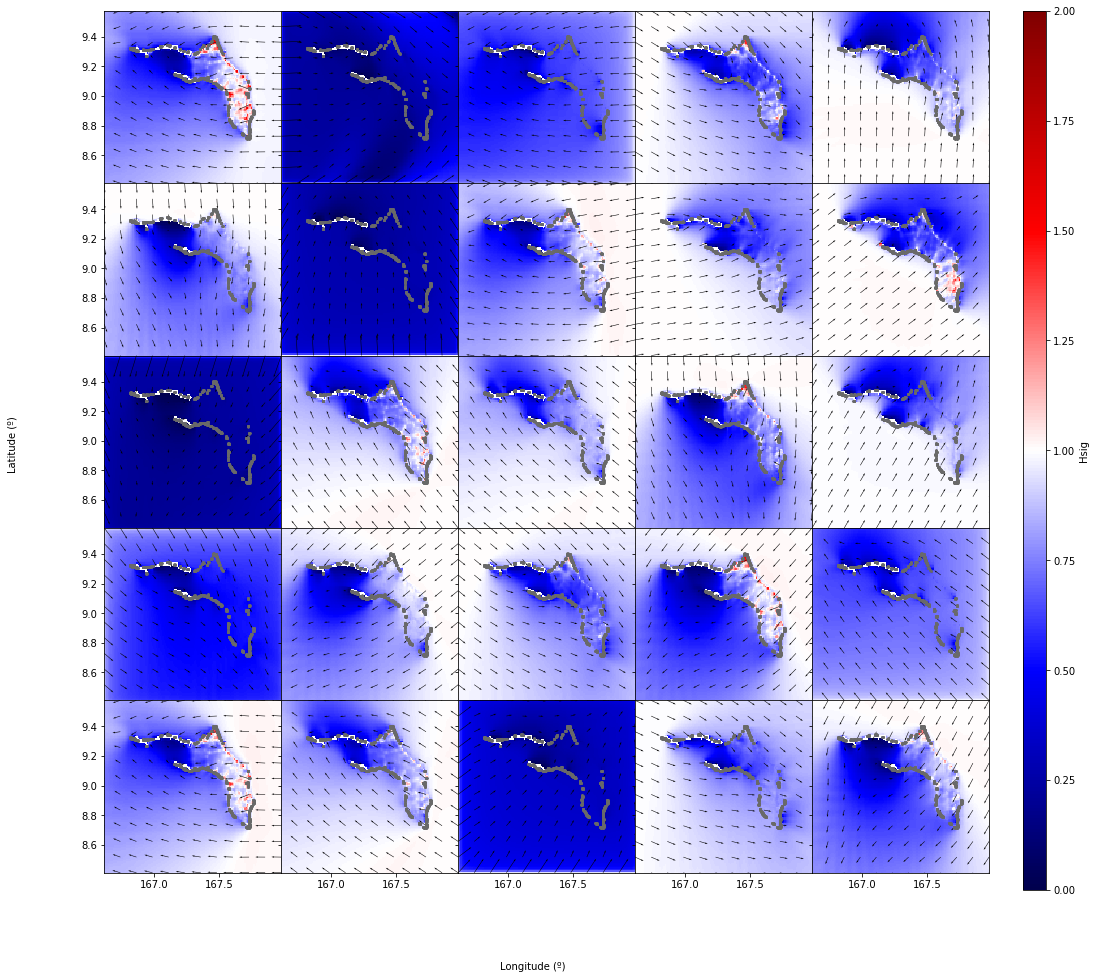

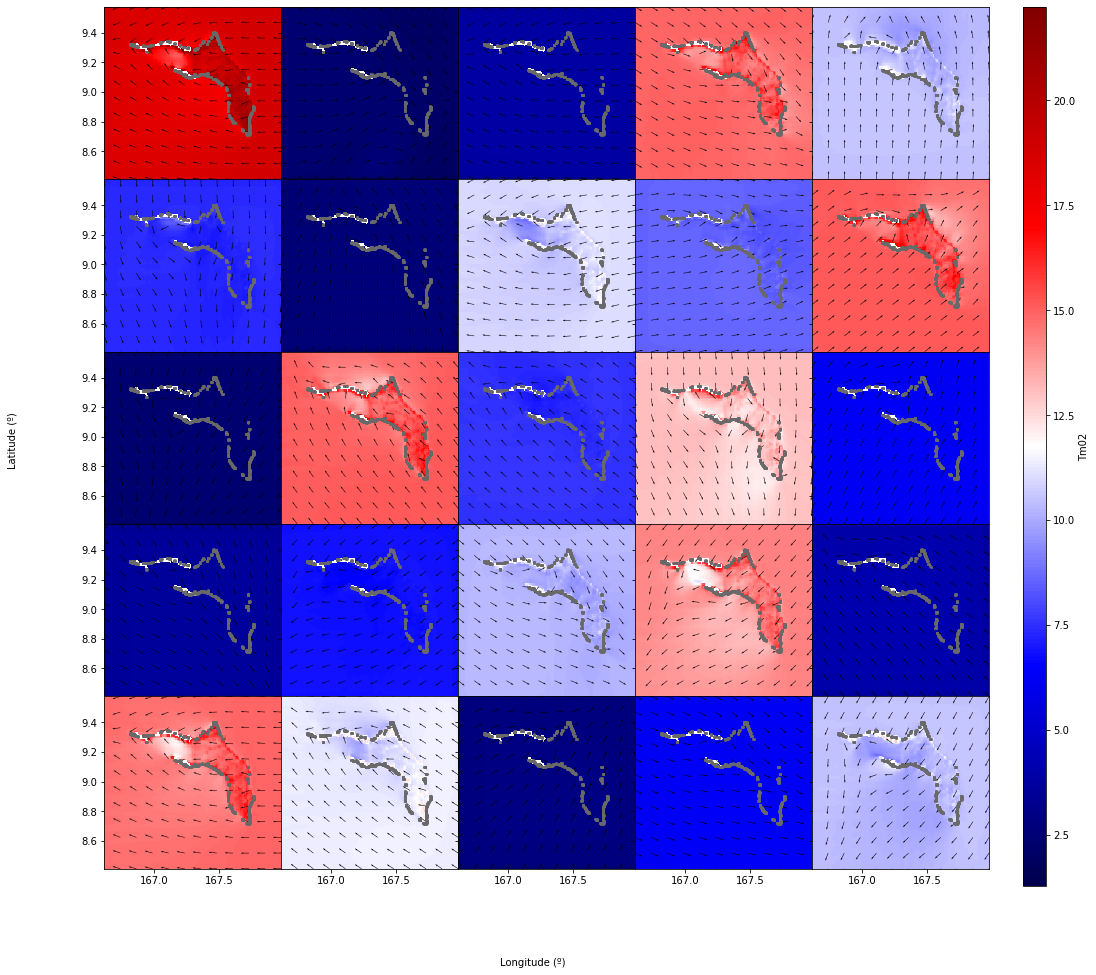

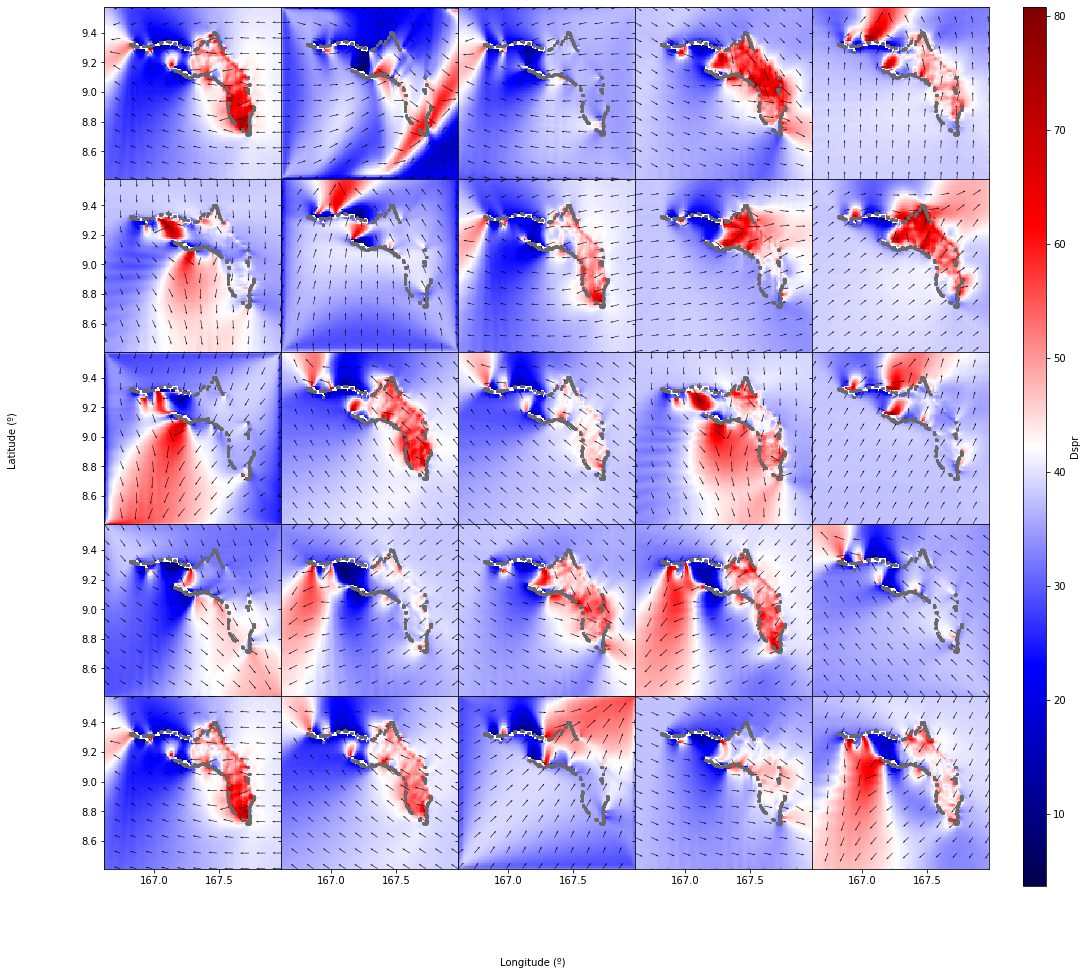

In [13]:
# extract output for main mesh
out_sea_mm_sim = sw.extract_output()
out_sea_mm_sim.to_netcdf(op.join(p_swan, 'out_main_sea.nc'))
print(out_sea_mm_sim)

# plot scatter maps
scatter_maps(out_sea_mm_sim, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);


<xarray.Dataset>
Dimensions:  (case: 125, lat: 80, lon: 120)
Coordinates:
  * lat      (lat) float64 9.351 9.351 9.353 9.354 ... 9.427 9.428 9.429 9.43
  * lon      (lon) float64 167.4 167.4 167.4 167.4 ... 167.5 167.5 167.5 167.5
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.52501106 0.46213725 ... 0.32179642
    Tm02     (case, lon, lat) float32 18.27626 17.427961 ... 4.167004 4.224309
    Dir      (case, lon, lat) float32 73.41127 66.7516 ... 207.90616 211.37247
    Dspr     (case, lon, lat) float32 45.58233 47.542145 ... 48.644485 29.866337
    TPsmoo   (case, lon, lat) float32 24.036688 23.988335 ... 4.448049 4.448966


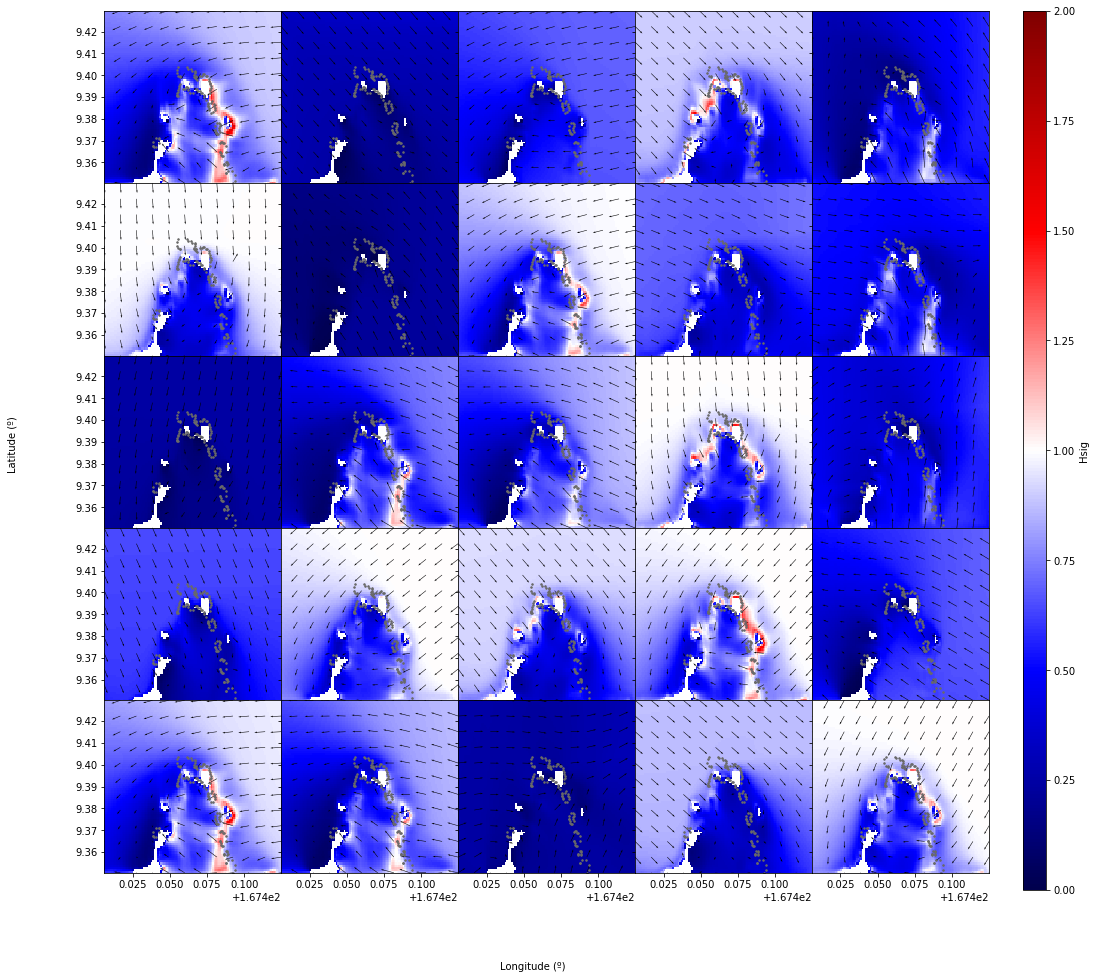

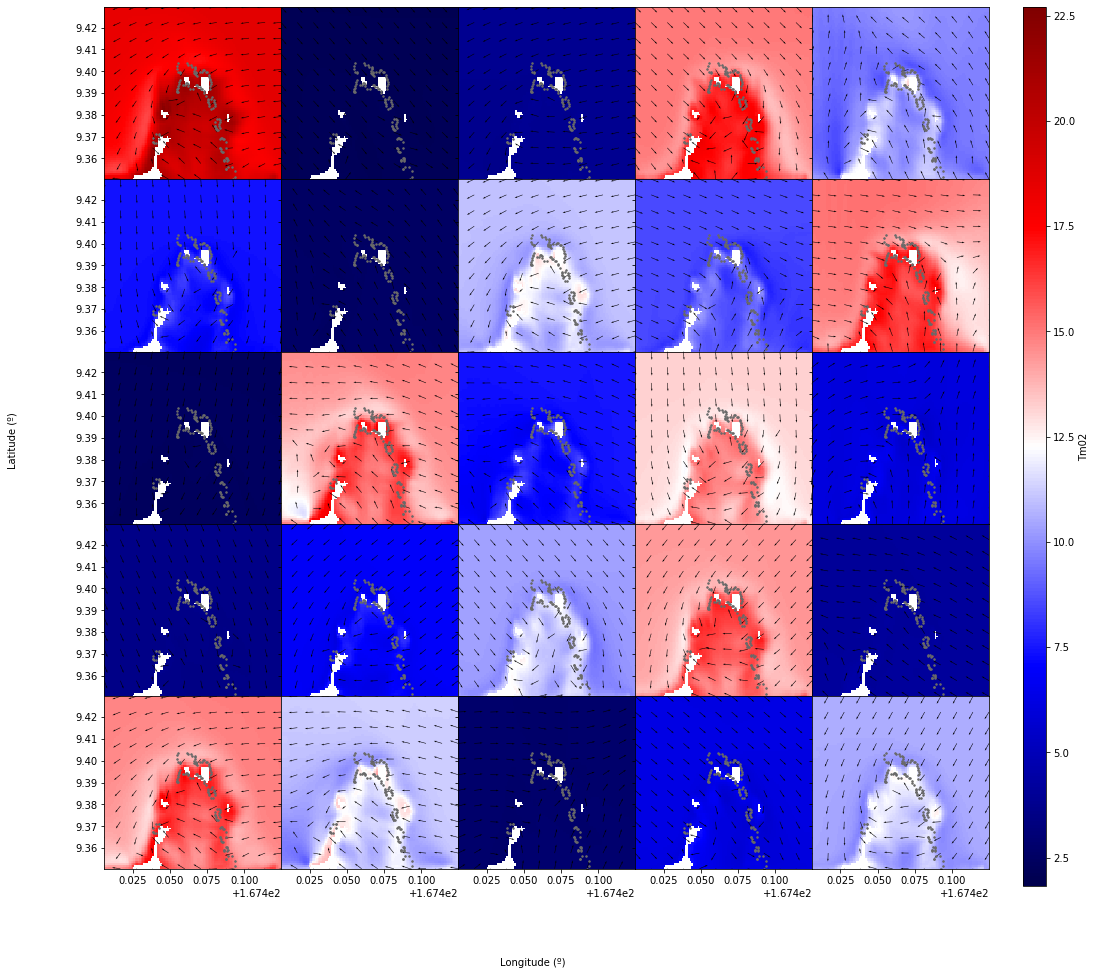

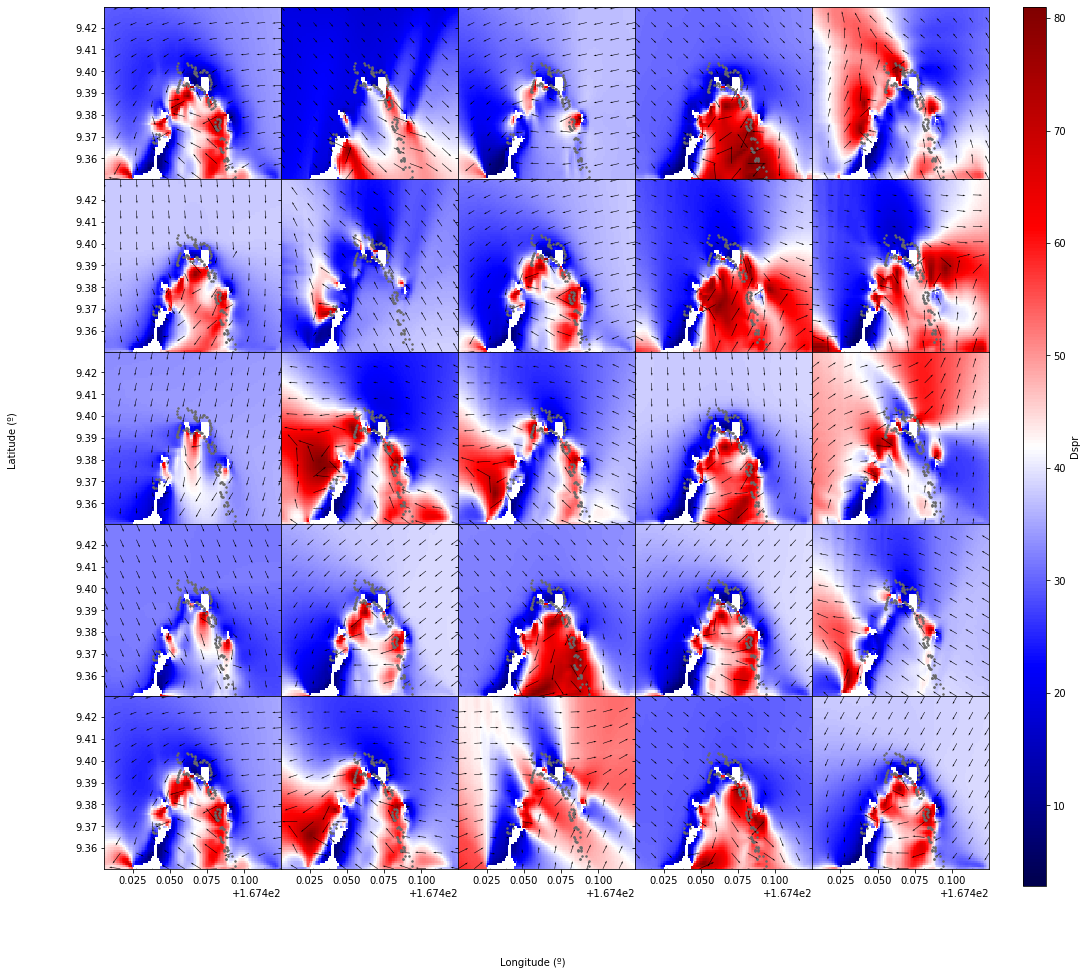

In [14]:
# extract output for nested mesh
out_sea_mn1_sim = sw.extract_output(mesh=sp.mesh_nest1)
out_sea_mn1_sim.to_netcdf(op.join(p_swan, 'out_nest1_sea.nc'))
print(out_sea_mn1_sim)

# plot scatter maps
scatter_maps(out_sea_mn1_sim, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);



## SWAN: SIMULATION SWELL waves 

In [15]:
# load Historical sea MDA subset
wvs_swell_subset = db_sim.Load('swl_subset')


# waves data hs and spr
wvs_swell_subset['hs'] = 1
wvs_swell_subset['spr'] = 10
wvs_swell_subset.rename(columns={'tp':'per'}, inplace=True)  # rename Tp for swan wrapper


# swan project
p_swan = db_sim.paths['swan_projects']
sp = SwanProject(p_swan, 'swell')


# main mesh: depth and computational grid 
sp.mesh_main.dg = main_grid.copy()
sp.mesh_main.cg = main_grid.copy()
sp.mesh_main.depth = np.loadtxt(p_swan_ext)

# nested mesh: depth and computational grid 
sp.mesh_nest1.dg = nested_grid.copy()
sp.mesh_nest1.cg = nested_grid.copy()
sp.mesh_nest1.depth = np.loadtxt(p_swan_int)

# activate nested mesh
sp.run_nest1 = True


# SWAN parameters 
sp.params = {
    'sea_level': 0,
    'jonswap_gamma': 10,
    'coords_spherical': 'CCM',
    'waves_period': 'PEAK',
    'nested_bounds': 'CLOSED',
}

    
# SWAN project wrapper
sw = SwanWrap_STAT(sp)

# build and launch cases
sw.build_cases(wvs_swell_subset)
sw.run_cases()


SWAN CASE: 0000 ---> hs    1.00, per   25.00, dir    2.41, spr   10.00
SWAN CASE: 0001 ---> hs    1.00, per    6.18, dir  185.92, spr   10.00
SWAN CASE: 0002 ---> hs    1.00, per    2.16, dir    5.43, spr   10.00
SWAN CASE: 0003 ---> hs    1.00, per   21.06, dir  226.48, spr   10.00
SWAN CASE: 0004 ---> hs    1.00, per   13.72, dir   79.84, spr   10.00
SWAN CASE: 0005 ---> hs    1.00, per   13.49, dir  315.49, spr   10.00
SWAN CASE: 0006 ---> hs    1.00, per    3.41, dir  274.78, spr   10.00
SWAN CASE: 0007 ---> hs    1.00, per    3.49, dir   95.40, spr   10.00
SWAN CASE: 0008 ---> hs    1.00, per   20.70, dir  136.76, spr   10.00
SWAN CASE: 0009 ---> hs    1.00, per   12.35, dir  239.92, spr   10.00
SWAN CASE: 0010 ---> hs    1.00, per   24.91, dir  289.90, spr   10.00
SWAN CASE: 0011 ---> hs    1.00, per   10.03, dir   18.17, spr   10.00
SWAN CASE: 0012 ---> hs    1.00, per   13.45, dir  163.36, spr   10.00
SWAN CASE: 0013 ---> hs    1.00, per   17.64, dir   20.23, spr   10.00
SWAN C

SWAN CASE: 0116 ---> hs    1.00, per   11.24, dir  279.44, spr   10.00
SWAN CASE: 0117 ---> hs    1.00, per    3.09, dir   76.64, spr   10.00
SWAN CASE: 0118 ---> hs    1.00, per   11.80, dir  355.63, spr   10.00
SWAN CASE: 0119 ---> hs    1.00, per    8.36, dir   84.32, spr   10.00
SWAN CASE: 0120 ---> hs    1.00, per   14.33, dir  233.35, spr   10.00
SWAN CASE: 0121 ---> hs    1.00, per    4.24, dir    1.74, spr   10.00
SWAN CASE: 0122 ---> hs    1.00, per    3.79, dir  233.62, spr   10.00
SWAN CASE: 0123 ---> hs    1.00, per   22.93, dir  357.78, spr   10.00
SWAN CASE: 0124 ---> hs    1.00, per   11.68, dir   77.86, spr   10.00
SWAN CASE: 0000 SOLVED
SWAN CASE: 0001 SOLVED
SWAN CASE: 0002 SOLVED
SWAN CASE: 0003 SOLVED
SWAN CASE: 0004 SOLVED
SWAN CASE: 0005 SOLVED
SWAN CASE: 0006 SOLVED
SWAN CASE: 0007 SOLVED
SWAN CASE: 0008 SOLVED
SWAN CASE: 0009 SOLVED
SWAN CASE: 0010 SOLVED
SWAN CASE: 0011 SOLVED
SWAN CASE: 0012 SOLVED
SWAN CASE: 0013 SOLVED
SWAN CASE: 0014 SOLVED
SWAN CASE: 0015 

<xarray.Dataset>
Dimensions:  (case: 125, lat: 118, lon: 137)
Coordinates:
  * lat      (lat) float64 8.411 8.42 8.43 8.44 8.45 ... 9.546 9.556 9.566 9.576
  * lon      (lon) float64 166.6 166.6 166.6 166.6 ... 167.9 168.0 168.0 168.0
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.9045533 0.9070987 ... 1.0104474
    Tm02     (case, lon, lat) float32 21.063658 21.064177 ... 9.970544 9.97059
    Dir      (case, lon, lat) float32 1.7834473 1.913147 ... 78.03235 78.03487
    Dspr     (case, lon, lat) float32 14.086012 14.272763 ... 12.7018175
    TPsmoo   (case, lon, lat) float32 24.55115 24.550117 ... 11.718024 11.718028


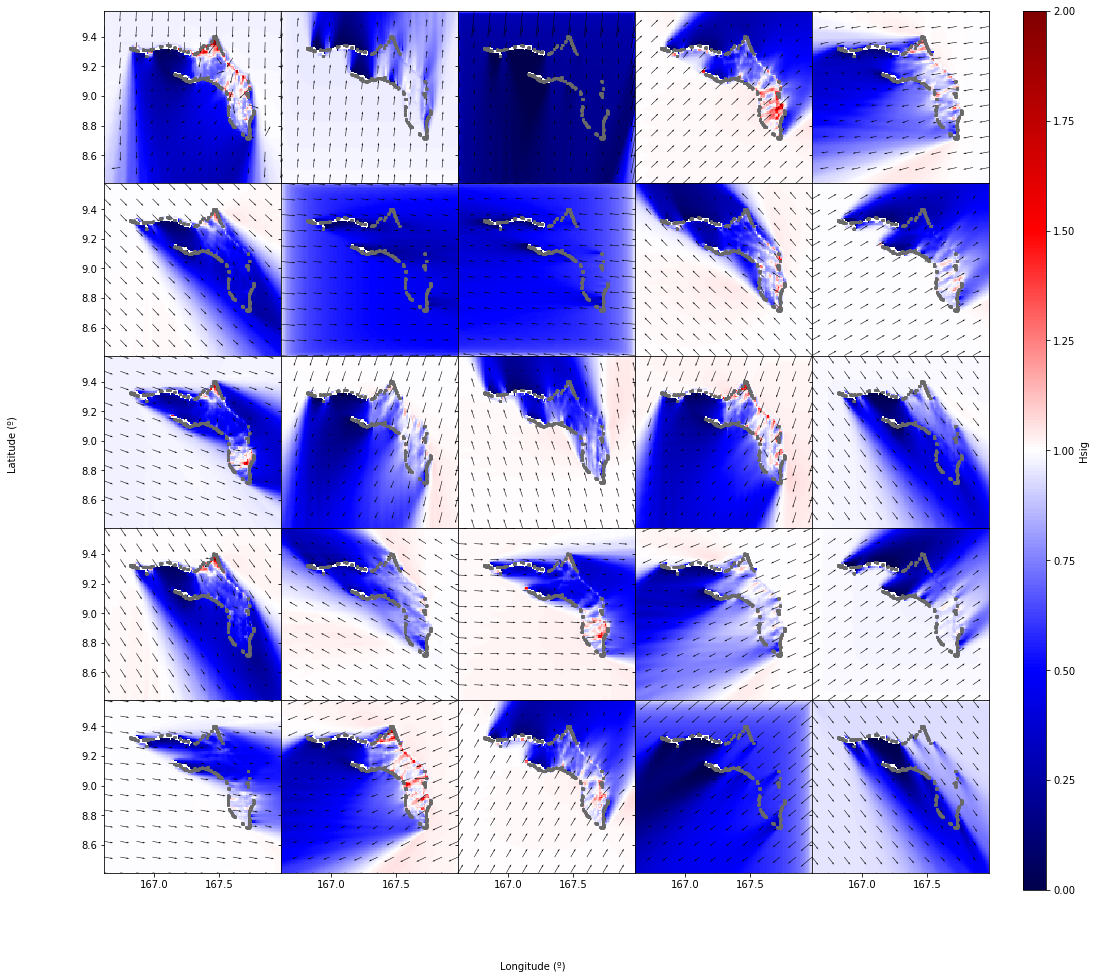

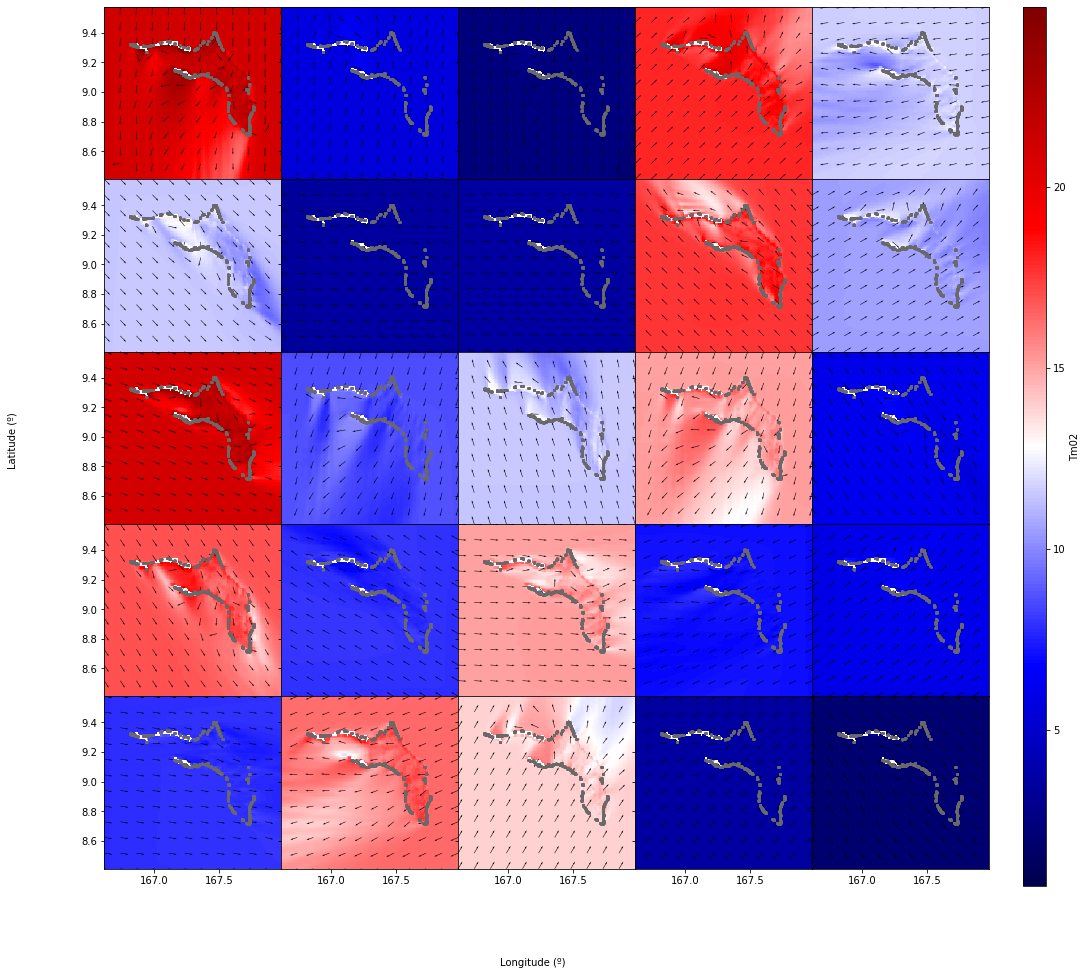

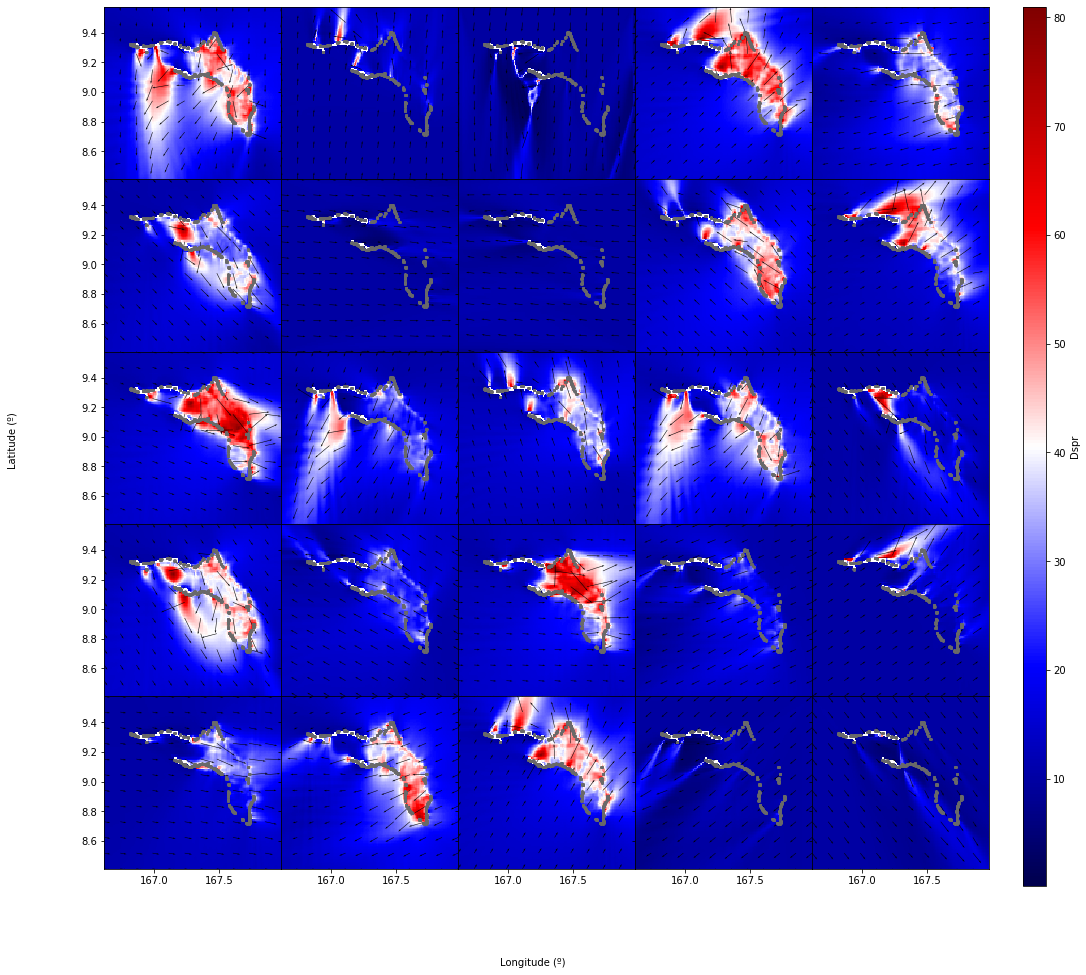

In [16]:
# extract output for main mesh
out_swl_mm_sim = sw.extract_output()
out_swl_mm_sim.to_netcdf(op.join(p_swan, 'out_main_swl.nc'))
print(out_swl_mm_sim)

# plot scatter maps
scatter_maps(out_swl_mm_sim, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);


<xarray.Dataset>
Dimensions:  (case: 125, lat: 80, lon: 120)
Coordinates:
  * lat      (lat) float64 9.351 9.351 9.353 9.354 ... 9.427 9.428 9.429 9.43
  * lon      (lon) float64 167.4 167.4 167.4 167.4 ... 167.5 167.5 167.5 167.5
Dimensions without coordinates: case
Data variables:
    Hsig     (case, lon, lat) float32 0.52501106 0.46213725 ... 0.32179642
    Tm02     (case, lon, lat) float32 18.27626 17.427961 ... 4.167004 4.224309
    Dir      (case, lon, lat) float32 73.41127 66.7516 ... 207.90616 211.37247
    Dspr     (case, lon, lat) float32 45.58233 47.542145 ... 48.644485 29.866337
    TPsmoo   (case, lon, lat) float32 24.036688 23.988335 ... 4.448049 4.448966


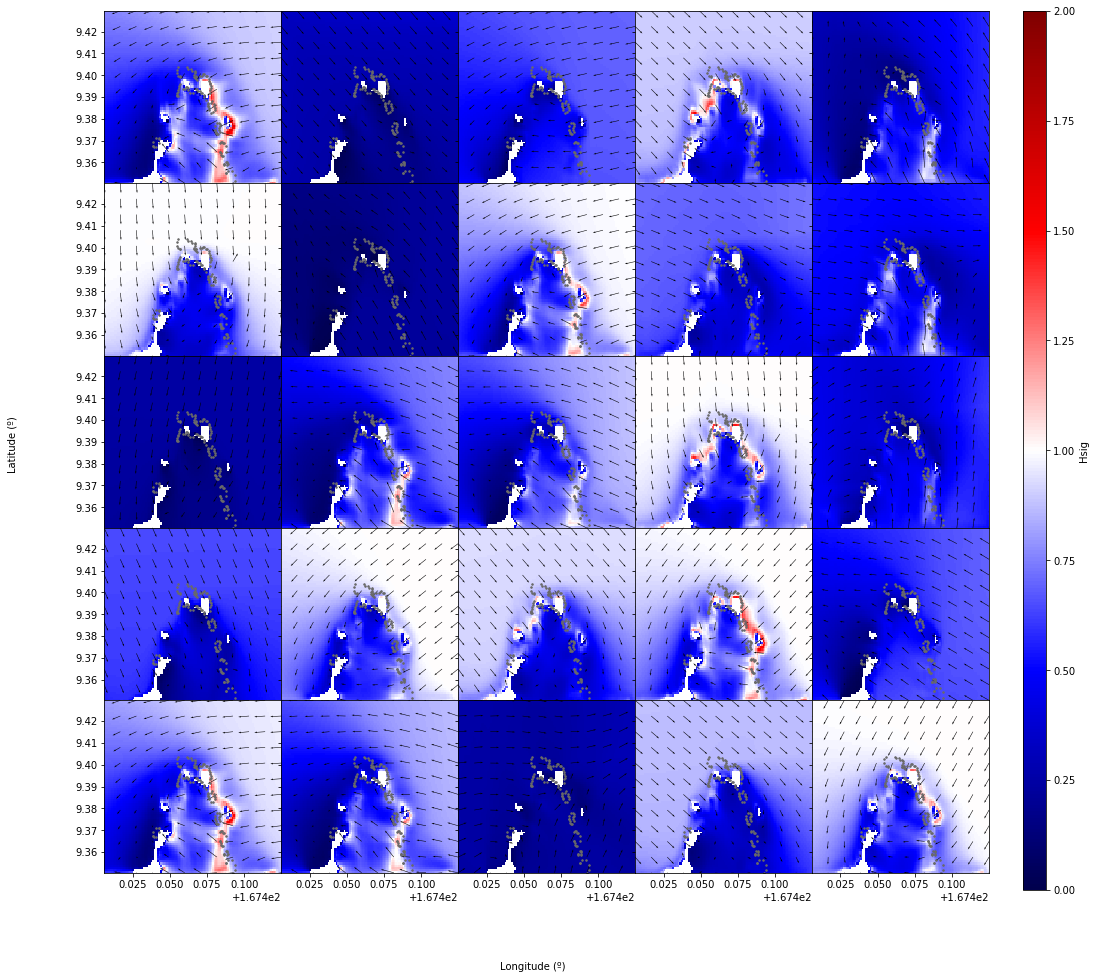

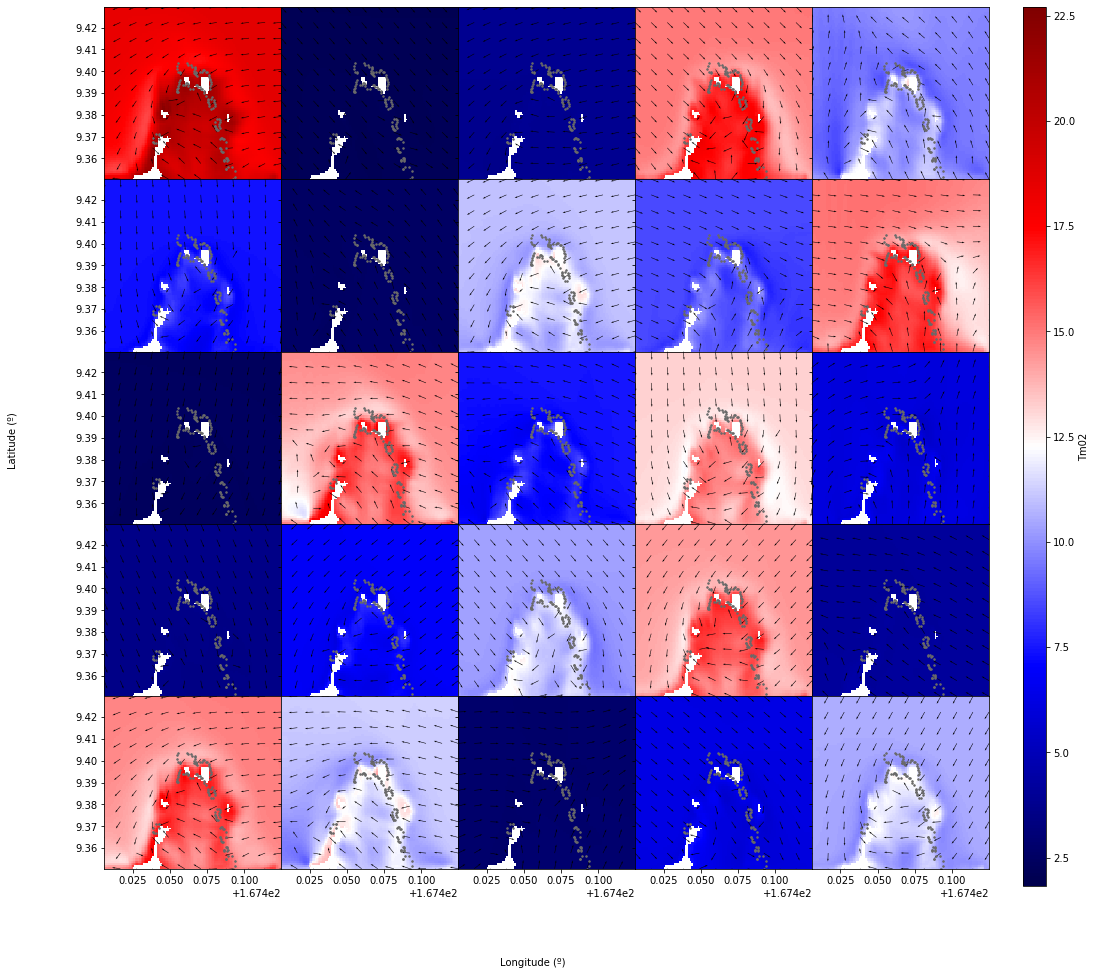

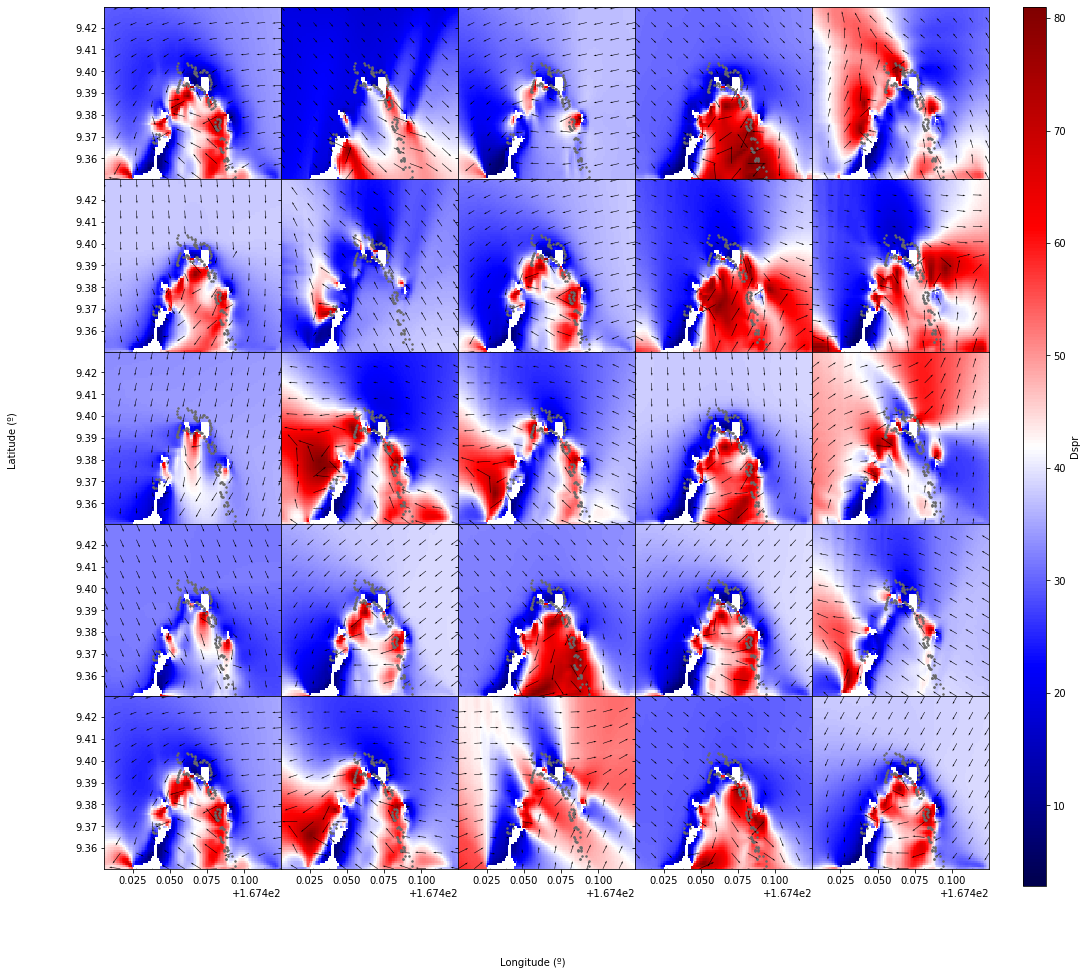

In [17]:
# extract output for nested mesh
out_swl_mn1_sim = sw.extract_output(mesh=sp.mesh_nest1)
out_swl_mn1_sim.to_netcdf(op.join(p_swan, 'out_nest1_swl.nc'))
print(out_sea_mn1_sim)

# plot scatter maps
scatter_maps(out_sea_mn1_sim, n_cases=25, var_limits={'Hsig':(0,2)}, np_shore=np_shore);



## RBF Reconstruction target: SIMULATION Point SEA and SWELLs propagations

In [18]:
# point to reconstruct 
ix_lon, ix_lat = 62, 66

# Extract output waves at point (from nest1 mesh)
p1_sea = out_sea_mn1_sim.isel({'lon':ix_lon, 'lat':ix_lat}).to_dataframe()
p1_swl = out_swl_mn1_sim.isel({'lon':ix_lon, 'lat':ix_lat}).to_dataframe()

# store data
db_sim.Save('sea_target', p1_sea)
db_sim.Save('swl_target', p1_swl)
